<a href="https://colab.research.google.com/github/revanks/EDA_on_usecases/blob/main/EDA_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
iris=files.upload()

Saving iris.csv to iris.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris=pd.read_csv("iris.csv")
iris.shape

(150, 5)

In [4]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [6]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.groupby('variety').agg(['mean', 'median'])

sepal.length        sepal.width  ... petal.length petal.width       
                   mean median        mean  ...       median        mean median
variety                                     ...                                
Setosa            5.006    5.0       3.428  ...         1.50       0.246    0.2
Versicolor        5.936    5.9       2.770  ...         4.35       1.326    1.3
Virginica         6.588    6.5       2.974  ...         5.55       2.026    2.0

[3 rows x 8 columns]

In [8]:
iris["variety"].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

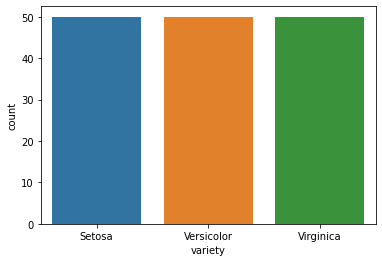

In [9]:
sns.countplot(x='variety', data=iris )
plt.show()

## characteristics of this dataset:
* 150 samples, with 4 attributes (same units, all numeric)
* Balanced class distribution (50 samples for each class)
* No missing data

# UNivariate

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

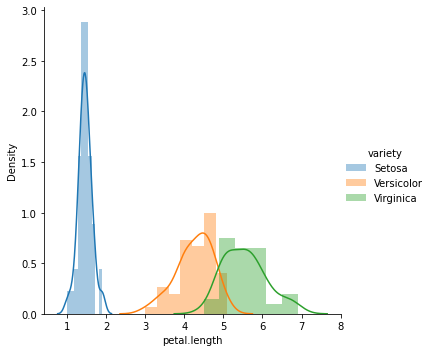

In [10]:
sns.FacetGrid(iris,hue="variety",size=5).map(sns.distplot,"petal.length").add_legend()

[0.06       0.15333333 0.09333333 0.18       0.10666667 0.17333333
 0.12       0.04       0.03333333 0.04      ]
[4.3  4.66 5.02 5.38 5.74 6.1  6.46 6.82 7.18 7.54 7.9 ]


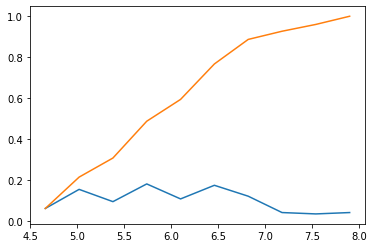

In [11]:
count, bin_edge =np.histogram(iris['sepal.length'], bins=10, density=True)
pdf=count/(sum(count))
print(pdf)
print(bin_edge)
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:], pdf)
plt.plot(bin_edge[1:], cdf)
plt.show();

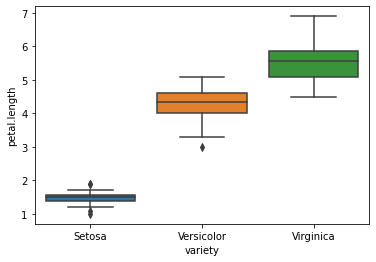

In [12]:
sns.boxplot(x="variety",y="petal.length",data=iris)
plt.show()

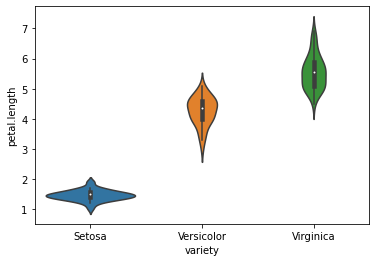

In [13]:
sns.violinplot(x="variety",y="petal.length",data=iris)
plt.show()

#Bivariate

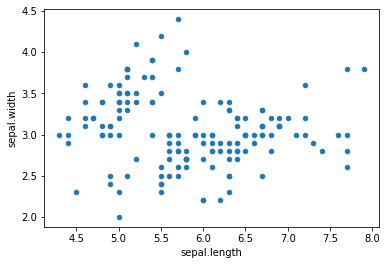

In [14]:
iris.plot(kind='scatter', x='sepal.length', y='sepal.width');
plt.show()

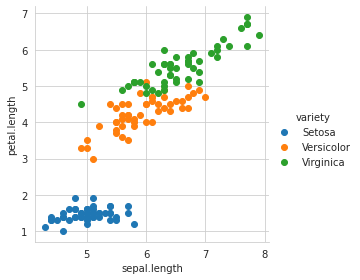

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="variety", height = 4).map(plt.scatter,'sepal.length', 'petal.length').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


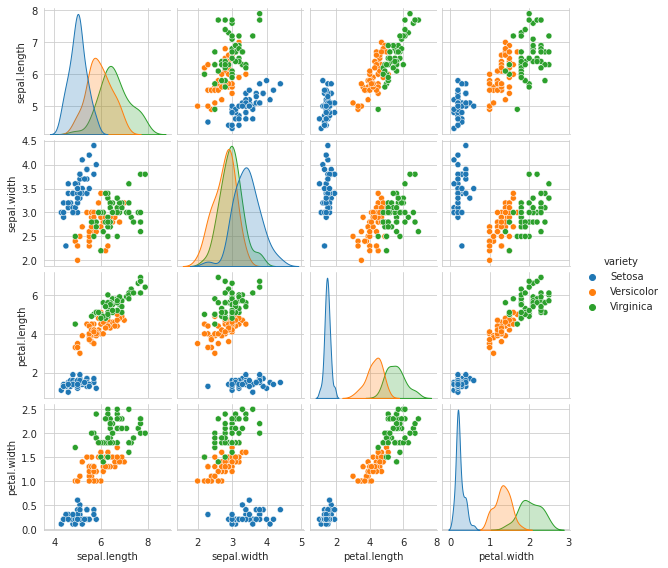

In [16]:
sns.set_style("whitegrid");
sns.pairplot(iris, hue='variety', size=2);
plt.show()

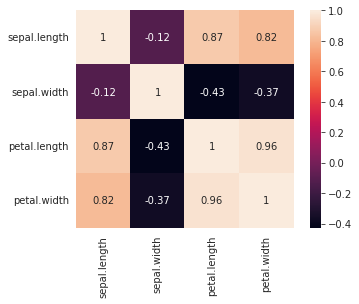

In [23]:
corrmat = iris.corr()
sns.heatmap(corrmat, annot = True, square = True);

# Build Classifier

In [18]:
from sklearn.model_selection import train_test_split
feature_columns = ['sepal.length',	'sepal.width',	'petal.length',	'petal.width']
predicted_class = ['variety']

X = iris[feature_columns].values
y = iris[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [20]:
## Apply Algorithm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())
predict_train_data = random_forest_model.predict(X_train)
predict_test_data = random_forest_model.predict(X_test)

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_test_data)))

Accuracy = 0.978


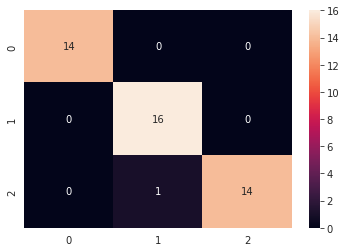

In [21]:
# Testing Set Performance
cm = confusion_matrix(predict_test_data, y_test)
sns.heatmap(cm, annot=True)

In [22]:
print(classification_report(predict_test_data, y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.94      1.00      0.97        16
   Virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

